# WeatherPy
----

##### Key Observations
1. There are more cities in the Northern Hemisphere (Antartica occupies a large portion of the southern hemisphere
2. There is a definite correlation between maximum temperature and distance to the equator
3. Humidy, Wind Speed and Cloudiness do not appear to have the same correlation with latitude

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

import requests
import json
import os

from matplotlib.offsetbox import AnchoredText

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "./output_data/cities.csv"
#output_data_file = "citiesA.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List
This is achieved using citipy to find the name of the nearest city based on latitude and longitude.  First a set of randm latitude and longitude values are generated.  Looping through those values identifies the nearest city using citipy and if the city is not already in the list of cities it is added. The result is a list of random city names. 

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000,  high=90.000, size=2000)
lngs = np.random.uniform(low=-180.000, high=180.000, size=2000)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)  #cities is a list of city names

# Print the city count to confirm sufficient count
len(cities)


737

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it's being processed (with the city number and city name).


In [3]:
# set up dataframe column names
column_names = ['City','Cloudiness','Country',
                'Date','Humidity','Lat','Lng',
                'Max Temp','Wind Speed']

# Create an empty list to populate with weather data
weather = []

# Print a banner
print('Beginning Data Retrieval')
print("------------------------------")

# Loop over the list of cities and request data from openweather
for i in range(0, len(cities)):
    # Set up the url for the city to query
    url="http://api.openweathermap.org/data/2.5/weather?q="+cities[i]+"&units=imperial&appid=283a9319d8bc008a581bb0b88d702293"
    #print(url)
    
    try: 
        # Make the request call and jsonify it all in one step
        response = requests.get(url).json()
        # Print a progress report to the screen
        print("Processing Record \033[36m {0}\033[0m of Set \033[36m {1} \033[0m | {2}".format(i, i, cities[i]))
        # append the call data to the weather list
        weather.append([response['name'], response['clouds']['all'], 
                    response['sys']['country'], 
                    response['dt'], response['main']['humidity'], response['coord']['lat'], 
                    response['coord']['lon'], response['main']['temp_max'], 
                    response['wind']['speed']])
    except:
        # If the city is not found just skip it and process the next city 
        print('City \033[1m not \033[0m found. Skipping...')

# Create a dataframe with the weather data
df = pd.DataFrame(weather, columns=column_names)
df


Beginning Data Retrieval
------------------------------
Processing Record  0 of Set  0  | mahebourg
Processing Record  1 of Set  1  | tuktoyaktuk
Processing Record  2 of Set  2  | manta
Processing Record  3 of Set  3  | dong hoi
Processing Record  4 of Set  4  | jamestown
Processing Record  5 of Set  5  | dikson
Processing Record  6 of Set  6  | los llanos de aridane
Processing Record  7 of Set  7  | barrow
Processing Record  8 of Set  8  | cap malheureux
Processing Record  9 of Set  9  | saint anthony
Processing Record  10 of Set  10  | hobart
Processing Record  11 of Set  11  | port elizabeth
Processing Record  12 of Set  12  | busselton
Processing Record  13 of Set  13  | khatanga
Processing Record  14 of Set  14  | mataura
Processing Record  15 of Set  15  | rikitea
Processing Record  16 of Set  16  | punta arenas
Processing Record  17 of Set  17  | tevriz
Processing Record  18 of Set  18  | ushuaia
Processing Record  19 of Set  19  | torbay
Processing Record  20 of Set  20  | coah

Processing Record  126 of Set  126  | sorvag
City  not  found. Skipping...
Processing Record  127 of Set  127  | topolobampo
Processing Record  128 of Set  128  | narsaq
Processing Record  129 of Set  129  | taolanaro
City  not  found. Skipping...
Processing Record  130 of Set  130  | puerto madryn
Processing Record  131 of Set  131  | georgetown
Processing Record  132 of Set  132  | marcona
City  not  found. Skipping...
Processing Record  133 of Set  133  | kavaratti
Processing Record  134 of Set  134  | inhambane
Processing Record  135 of Set  135  | sioux lookout
Processing Record  136 of Set  136  | tahoua
Processing Record  137 of Set  137  | new norfolk
Processing Record  138 of Set  138  | victoria
Processing Record  139 of Set  139  | mehamn
Processing Record  140 of Set  140  | ancud
Processing Record  141 of Set  141  | cidreira
Processing Record  142 of Set  142  | cockburn town
Processing Record  143 of Set  143  | port alfred
Processing Record  144 of Set  144  | lebu
Proc

Processing Record  244 of Set  244  | techiman
Processing Record  245 of Set  245  | pandan
Processing Record  246 of Set  246  | coquimbo
Processing Record  247 of Set  247  | kingston
Processing Record  248 of Set  248  | saint-philippe
Processing Record  249 of Set  249  | hambantota
Processing Record  250 of Set  250  | riyadh
Processing Record  251 of Set  251  | nizhneyansk
City  not  found. Skipping...
Processing Record  252 of Set  252  | staraya poltavka
Processing Record  253 of Set  253  | ipora
Processing Record  254 of Set  254  | tasiilaq
Processing Record  255 of Set  255  | marsh harbour
Processing Record  256 of Set  256  | ponta do sol
Processing Record  257 of Set  257  | kologriv
Processing Record  258 of Set  258  | jiayuguan
Processing Record  259 of Set  259  | sambava
Processing Record  260 of Set  260  | yanchukan
City  not  found. Skipping...
Processing Record  261 of Set  261  | hazorasp
Processing Record  262 of Set  262  | padang
Processing Record  263 of S

Processing Record  364 of Set  364  | samarai
Processing Record  365 of Set  365  | khingansk
Processing Record  366 of Set  366  | lagoa
Processing Record  367 of Set  367  | santa flavia
Processing Record  368 of Set  368  | osypenko
Processing Record  369 of Set  369  | makurdi
Processing Record  370 of Set  370  | catuday
Processing Record  371 of Set  371  | kralendijk
Processing Record  372 of Set  372  | otavi
Processing Record  373 of Set  373  | ilulissat
Processing Record  374 of Set  374  | cedar city
Processing Record  375 of Set  375  | ierapetra
Processing Record  376 of Set  376  | iqaluit
Processing Record  377 of Set  377  | caravelas
Processing Record  378 of Set  378  | port blair
Processing Record  379 of Set  379  | aojiang
Processing Record  380 of Set  380  | port hardy
Processing Record  381 of Set  381  | abha
Processing Record  382 of Set  382  | margate
Processing Record  383 of Set  383  | gumdag
Processing Record  384 of Set  384  | flin flon
Processing Rec

Processing Record  485 of Set  485  | sanquhar
Processing Record  486 of Set  486  | smithers
Processing Record  487 of Set  487  | great yarmouth
Processing Record  488 of Set  488  | toliary
City  not  found. Skipping...
Processing Record  489 of Set  489  | kholtoson
Processing Record  490 of Set  490  | nelson bay
Processing Record  491 of Set  491  | mao
Processing Record  492 of Set  492  | guiglo
Processing Record  493 of Set  493  | chumikan
Processing Record  494 of Set  494  | anadyr
Processing Record  495 of Set  495  | rio branco do sul
Processing Record  496 of Set  496  | alibag
Processing Record  497 of Set  497  | huayucachi
Processing Record  498 of Set  498  | bargal
City  not  found. Skipping...
Processing Record  499 of Set  499  | pangody
Processing Record  500 of Set  500  | burns lake
Processing Record  501 of Set  501  | temaraia
City  not  found. Skipping...
Processing Record  502 of Set  502  | kahului
Processing Record  503 of Set  503  | hernani
Processing R

Processing Record  604 of Set  604  | auki
Processing Record  605 of Set  605  | magalia
Processing Record  606 of Set  606  | bahia de caraquez
Processing Record  607 of Set  607  | nemuro
Processing Record  608 of Set  608  | ilebo
Processing Record  609 of Set  609  | amapa
Processing Record  610 of Set  610  | salta
Processing Record  611 of Set  611  | wajid
Processing Record  612 of Set  612  | ivankiv
Processing Record  613 of Set  613  | andevoranto
City  not  found. Skipping...
Processing Record  614 of Set  614  | balikpapan
Processing Record  615 of Set  615  | itoman
Processing Record  616 of Set  616  | puerto del rosario
Processing Record  617 of Set  617  | brinkovskaya
Processing Record  618 of Set  618  | tiarei
Processing Record  619 of Set  619  | ust-kuyga
Processing Record  620 of Set  620  | libenge
Processing Record  621 of Set  621  | kadykchan
City  not  found. Skipping...
Processing Record  622 of Set  622  | ribnica
Processing Record  623 of Set  623  | skjer

Processing Record  725 of Set  725  | solnechnyy
Processing Record  726 of Set  726  | qasigiannguit
Processing Record  727 of Set  727  | ouesso
Processing Record  728 of Set  728  | palaikastron
Processing Record  729 of Set  729  | thinadhoo
Processing Record  730 of Set  730  | ranot
Processing Record  731 of Set  731  | amga
Processing Record  732 of Set  732  | sorland
Processing Record  733 of Set  733  | hualmay
Processing Record  734 of Set  734  | grants pass
Processing Record  735 of Set  735  | makakilo city
Processing Record  736 of Set  736  | lobva


,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Mahébourg,40,MU,1584135073,94,-20.41,57.70,75.00,3.36
1,Tuktoyaktuk,75,CA,1584135073,85,69.45,-133.04,17.60,25.28
2,Manta,20,EC,1584135073,66,-0.95,-80.73,84.20,11.41
3,Kwang Binh,90,VN,1584135073,96,17.48,106.60,73.49,4.56
4,Jamestown,1,US,1584135073,48,42.10,-79.24,46.40,27.51
...,...,...,...,...,...,...,...,...,...
673,Sørland,75,NO,1584135203,63,67.67,12.69,26.60,23.04
674,Hualmay,30,PE,1584135054,54,-11.10,-77.61,80.69,10.20
675,Grants Pass,20,US,1584135203,22,42.44,-123.33,61.00,3.96
676,Makakilo City,20,US,1584135103,65,21.35,-158.09,78.80,5.68


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [21]:
# Save the city data into a CSV file
df.to_csv (output_data_file, header=True, index = False)

# display the dataframe
df

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Mahébourg,40,MU,1584135073,94,-20.41,57.70,75.00,3.36
1,Tuktoyaktuk,75,CA,1584135073,85,69.45,-133.04,17.60,25.28
2,Manta,20,EC,1584135073,66,-0.95,-80.73,84.20,11.41
3,Kwang Binh,90,VN,1584135073,96,17.48,106.60,73.49,4.56
4,Jamestown,1,US,1584135073,48,42.10,-79.24,46.40,27.51
...,...,...,...,...,...,...,...,...,...
673,Sørland,75,NO,1584135203,63,67.67,12.69,26.60,23.04
674,Hualmay,30,PE,1584135054,54,-11.10,-77.61,80.69,10.20
675,Grants Pass,20,US,1584135203,22,42.44,-123.33,61.00,3.96
676,Makakilo City,20,US,1584135103,65,21.35,-158.09,78.80,5.68


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

In [5]:
# A function to correctly label plots

def label_plot(plt,plot_title, x_axis, y_axis):
    plt.set_title(plot_title)
    plt.set_xlabel(x_axis)
    plt.set_ylabel(y_axis)
    

#### Latitude vs. Temperature Plot

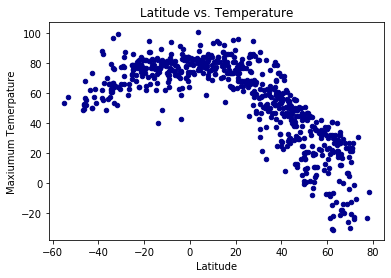

In [6]:
ax1 = df.plot.scatter(x='Lat',
                      y='Max Temp',
                      c='DarkBlue')
label_plot(ax1, 'Latitude vs. Temperature', "Latitude", "Maxiumum Temerpature")
plt.savefig('LatVTemp.png')
plt.show()

#### Latitude vs Temperature: Observation
Temperatures tend to peak at distance closer to the equator (increasing as it approaches latitude 0) then falls off by distance either to the north or south, with much cooler temperatures observed in the Northern Hemisphere ciites (of course this could be due to the fact there are more cities in the Northern Hemisphere). 

#### Latitude vs. Humidity Plot

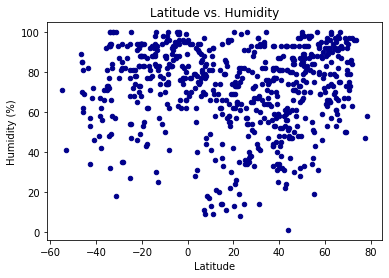

In [7]:
ax1 = df.plot.scatter(x='Lat',
                      y='Humidity',
                      c='DarkBlue')
label_plot(ax1, 'Latitude vs. Humidity', "Latitude", "Humidity (%)")
plt.savefig('LatVHumid.png')
plt.show()

#### Latitude vs Humidity: Observation
Humidity appears (for this data set) not to vary greatly by latitude, with the exceptions being north and south extremes. 

#### Latitude vs. Cloudiness Plot

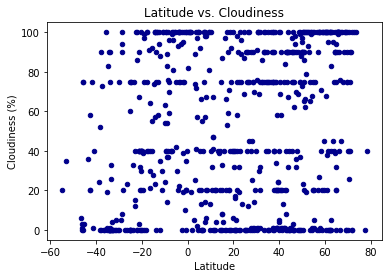

In [8]:
ax1 = df.plot.scatter(x='Lat',
                      y='Cloudiness',
                      c='DarkBlue')
label_plot(ax1, 'Latitude vs. Cloudiness', "Latitude", "Cloudiness (%)")
plt.savefig('LatVCloud.png')
plt.show()

#### Latitude vs Cloudiness: Observation
There appears to be no strong correlation between latitude and cloudiness. 

#### Latitude vs. Wind Speed Plot

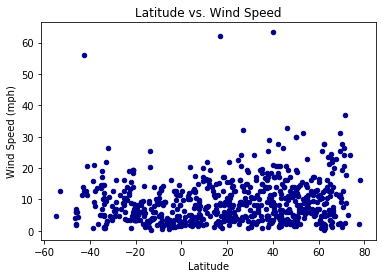

In [9]:
ax1 = df.plot.scatter(x='Lat',
                      y='Wind Speed',
                      c='DarkBlue')
label_plot(ax1, 'Latitude vs. Wind Speed', "Latitude", "Wind Speed (mph)")
plt.savefig('LatVWind.png')
plt.show()

#### Latitude vs Windspeed: Observation
Again there is no real visible correlation between latitude and windspeed, althought the highest winds are in the Nothern Hemisphere - this could be due to the fact there are more cities. The outliers at roughly -40, 20 and 40 are interesting and indictate very fast winds at these latitudes. 

## Linear Regression

In [10]:
# OPTIONAL: Create a function to create Linear Regression plots

# Calculate the correlation coefficient and linear regression 
# model for mouse weight and average tumor volume for the Capomulin regimenn
# Use sci pi to the the pearson r measure of correlation (r value)

def plot_linear_regression(x_values, y_values, x_label, y_label):    

    # Do a line regression on x and y values to calculate values for the line
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    
    # Longer print message - can uncomment if would prefer longer message
#     print('The correlation between ' + x_label + 
#       '\033[1m and \033[0m' +
#       'the ' + y_label +
#       '\033[1m is \033[0m' + 
#        f'\033[36m {rvalue:2.2f} \033[0m')

    fig, ax = plt.subplots()

    
    print('The r-squared' + '\033[1m is \033[0m' + f'\033[36m {rvalue:2.6f} \033[0m')

    # Create a scatter plot of weight versus average tumor volume
    ax.scatter(x_values,y_values)
    
    # Add a red line to indicate the correlation
    ax.plot(x_values,regress_values,"r-")
    
    # Create labels for the axes
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(x_label+" Versus "+ y_label)

    # Annotate with the line equation
    line_eq = " y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    #plt.annotate(line_eq,(min(x_values), 1.75*(max(y_values)/2)),fontsize=12,color="red")
    at = AnchoredText(line_eq,
                  prop=dict(size=10), frameon=True,
                  loc='upper right',
                  bbox_to_anchor=(1.3, 1.),
                  bbox_transform=ax.transAxes
                  )
    at.patch.set_boxstyle("round,pad=0.,rounding_size=0.2")
 
    ax.add_artist(at)
    # Show the plot
    ax

In [11]:
# Create Northern and Southern Hemisphere DataFrames
northern_df = df[df['Lat'] >= 0]    #greater than or equal to 0 degrees latitude
southern_df = df[df['Lat'] <  0]   #less than 0 degrees latitude

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is  -0.856636 


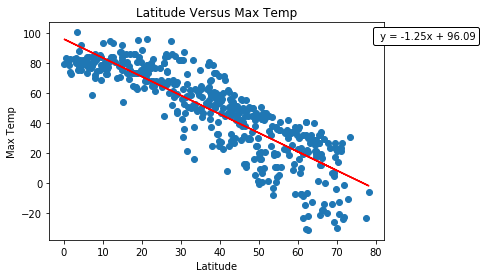

In [12]:
# Call the linear regression function
plot_linear_regression(northern_df['Lat'], northern_df['Max Temp'], "Latitude", "Max Temp")

##### Northern Hemisphere - Max Temp vs. Latitude Linear Regression: Obervation
There is a strong negative correlation between max temperatures and latitude.  As we move northward away from the equator (latitude 0) maximum temperatures delcine.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is  0.482905 


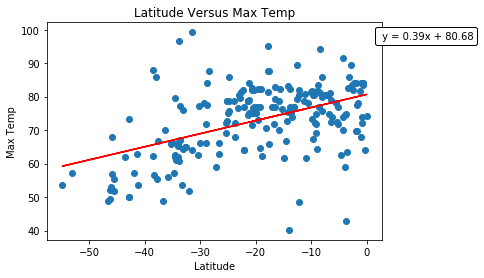

In [13]:
plot_linear_regression(southern_df['Lat'], southern_df['Max Temp'], "Latitude",  "Max Temp")

##### Southern Hemisphere - Max Temp vs. Latitude Observation
There is a very weak positive correlation between max temperatures and latitude.  As we move northward toward from the equator (latitude 0) maximum temperatures do increase but the r-squared value is less than 1.  

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is  0.234634 


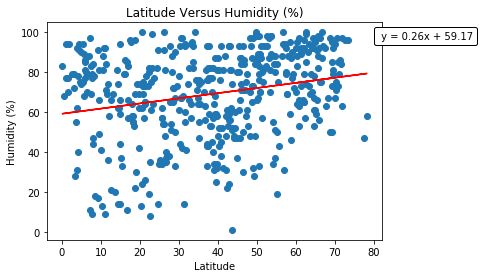

In [14]:
plot_linear_regression(northern_df['Lat'], northern_df['Humidity'], "Latitude",  "Humidity (%)")

#####  Northern Hemisphere - Humidity (%) vs. Latitude Observation

There is no correlation between the percentage humidity and latitude in the northern hemisphere.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is  0.277904 


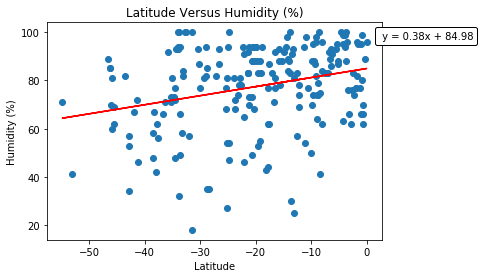

In [15]:
plot_linear_regression(southern_df['Lat'], southern_df['Humidity'], "Latitude", "Humidity (%)")

#####  Southern Hemisphere - Humidity (%) vs. Latitude Observation
There is no correlation between the percentage humidity and latitude in the southern hemisphere.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is  0.174836 


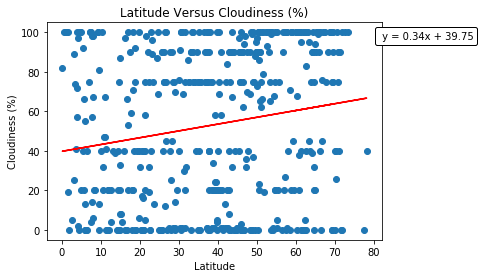

In [16]:
plot_linear_regression(northern_df['Lat'], northern_df['Cloudiness'], "Latitude", "Cloudiness (%)")

#####  Northern Hemisphere - Cloudiness vs. Latitude Observation
There is no correlation between the percentage cloudiness and latitude in the northern hemisphere.  The grid like structure of the scatter plot indicates there might be some binning or rounding of wind speeds in this data set.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is  0.412640 


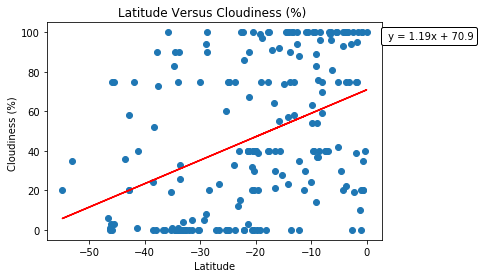

In [17]:
plot_linear_regression(southern_df['Lat'], southern_df['Cloudiness'], "Latitude", "Cloudiness (%) ")

#####  Southern Hemisphere - Cloudiness vs. Latitude Observation
There is no correlation between the percentage humidity and latitude in the southern hemisphere, although there do seem to be a higher cluster of clouds closer to the equator, and very sparse cloud over as we move south from the equator. 

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is  0.136861 


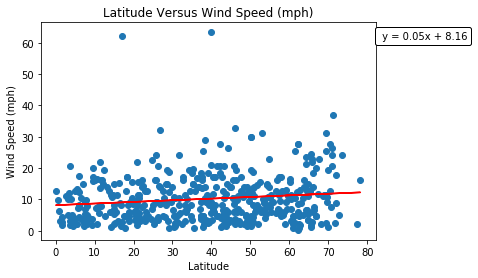

In [18]:
plot_linear_regression(northern_df['Lat'], northern_df['Wind Speed'], "Latitude" , "Wind Speed (mph)")

#####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Observation
There is no correlation between the wind speed and latitude in the northern hemisphere.  Again ther are some outliers at 20 and 40 degree latitude lines indicating faster winds. 

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is  -0.255361 


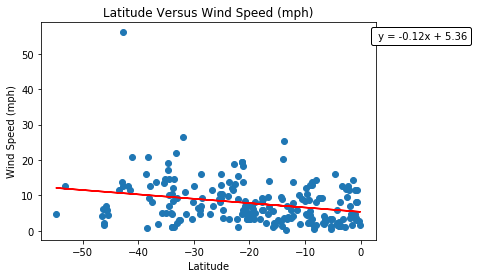

In [19]:
plot_linear_regression( southern_df['Lat'], southern_df['Wind Speed'], "Latitude", "Wind Speed (mph)")

#####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Observation
There is no correlation between the wind speed  and latitude in the southern hemisphere.  A single datapoint shows faster winds at -40. 

# End of Notebook 